In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report
#smote
from imblearn.over_sampling import SMOTE


In [2]:
df=pd.read_csv("synthetic_spam.csv")
df.head()

,word_freq_free,word_freq_money,word_freq_offer,email_length,spam
0,1.57,0.47,0.87,485,1
1,3.88,0.08,0.19,241,0
2,3.80,3.26,0.07,433,1
3,0.91,4.71,0.85,379,1
4,2.05,4.87,3.18,193,1


In [3]:
df.isnull().sum()

word_freq_free     0
word_freq_money    0
word_freq_offer    0
email_length       0
spam               0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(120, 5)

<Axes: xlabel='email_length', ylabel='Count'>

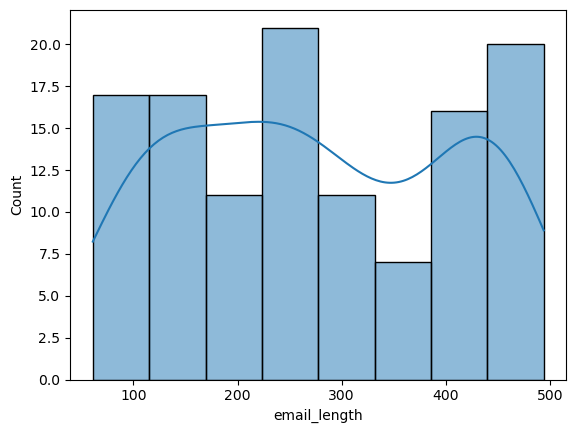

In [8]:
sns.histplot(df["email_length"],kde=True)

<Axes: xlabel='word_freq_free', ylabel='Count'>

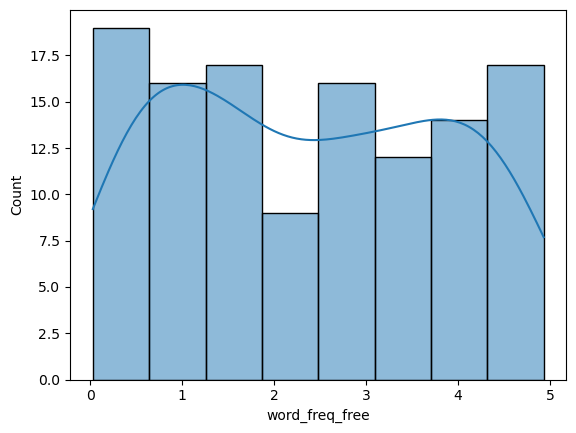

In [9]:
sns.histplot(df["word_freq_free"],kde=True)

<Axes: xlabel='word_freq_money', ylabel='Count'>

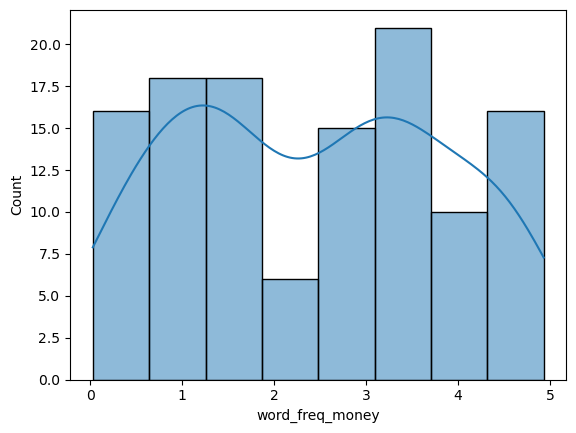

In [10]:
sns.histplot(df["word_freq_money"],kde=True)

<Axes: xlabel='word_freq_offer', ylabel='Count'>

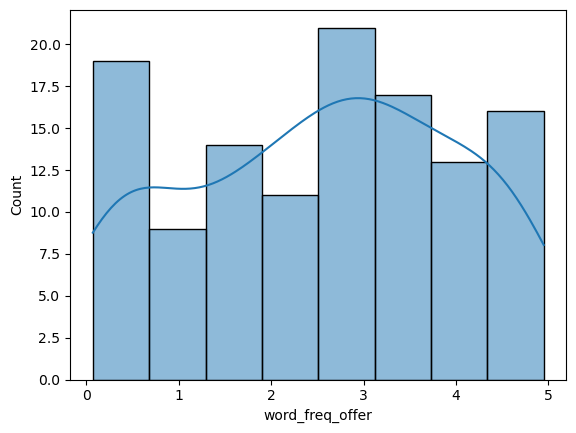

In [11]:
sns.histplot(df["word_freq_offer"],kde=True)

<Axes: >

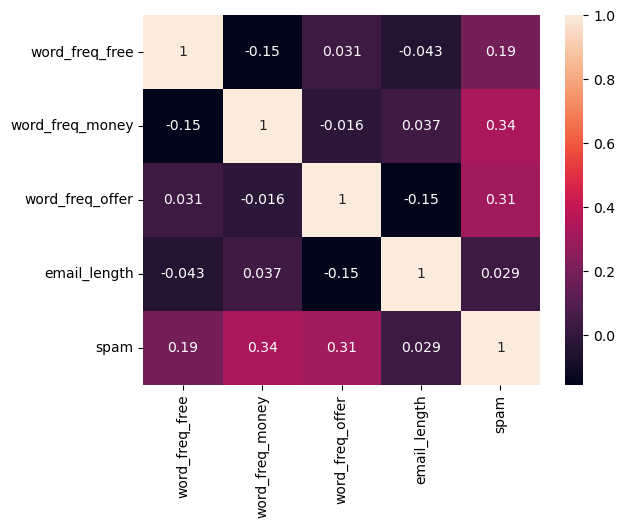

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df["spam"].value_counts(normalize=True)

spam
1    0.875
0    0.125
Name: proportion, dtype: float64

In [20]:
x=df.drop(columns=["spam"])
y=df["spam"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)
model=MultinomialNB()
model.fit(x_train_res,y_train_res)
y_pred=model.predict(x_test)

In [22]:
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("precision_score",precision_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score: 0.6666666666666666
f1 score: 0.7894736842105263
recall: 0.6521739130434783
precision_score 1.0
confusion matrix: [[ 1  0]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.11      1.00      0.20         1
           1       1.00      0.65      0.79        23

    accuracy                           0.67        24
   macro avg       0.56      0.83      0.49        24
weighted avg       0.96      0.67      0.76        24

